In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import matplotlib.dates as date
from sklearn import preprocessing
import math


Data from (https://covid.cdc.gov/covid-data-tracker/#trends_totalcases_totalcasesper100k|tot_cases|incidence)

In [2]:
df = pd.read_csv('./data_table_for_total_cases__the_united_states.csv',header=2)
df['Date'] =pd.to_datetime(df.Date)
df=df.sort_values(by='Date')
x_array = np.array(df['Total Cases'])
np.shape(x_array)
df['Total Cases']=preprocessing.normalize(x_array.reshape(1,-1)).reshape(628)*150000


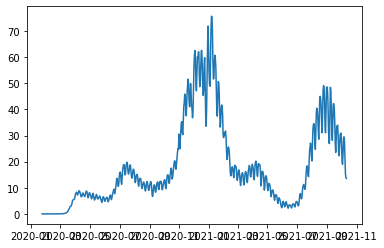

In [3]:
q = np.gradient(df['Total Cases']) # rate of hospitalizations in the US
q1 = q*.68 ## within 1 standard deviation
q2 = q*.32 ## more than 1 standard deviation

plt.plot(df["Date"],q)

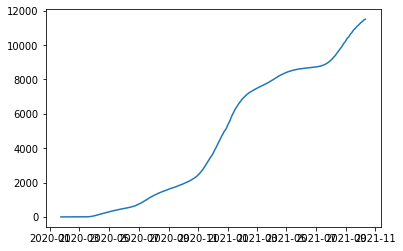

In [4]:
plt.plot(df["Date"],df["Total Cases"])


Covid cases can be modeled by 
$$ A(1-e^{-t/B}) $$

Quick increase and slow to flatten (similar to a capacitor)

In [5]:
def totalCases(t,A,B):
    return A*(1-np.exp(-t/B))

In [6]:
t = np.linspace(0,len(df["Date"]),len(df['Total Cases']))
# plt.plot(t,df["Total Cases"])
popt,pcov = curve_fit(totalCases,t,df['Total Cases'])
print(*popt)

509002360.65823054 31563326.890761636


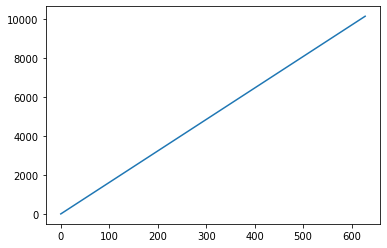

In [7]:

plt.plot(t,totalCases(t,*popt)) 


509002360.65823054 31563326.890761636


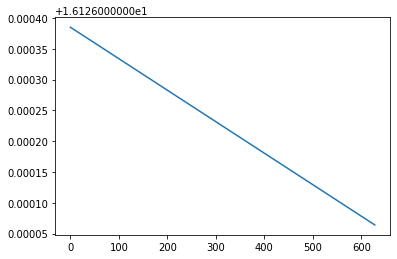

In [8]:
pqin= lambda t,A,B: np.exp(-t/B)*A/B
plt.plot(t,pqin(t,*popt))
print(*popt)

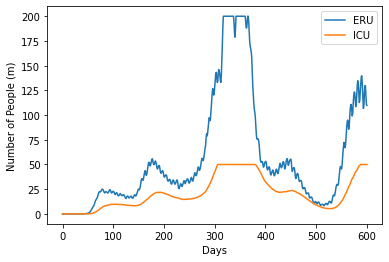

In [9]:
import numpy as np
import matplotlib.pyplot as plt
seats,respirators,nurses=200,50,10

def tank():
   qin = lambda t: pqin(t,*popt)  # people being charged in

   dt = 1 # hr
   tf = 600 # hr
   n = int(tf/dt+1)

   h1 = 0
   h2 = 0
   t = 0
   ts = np.empty(n)
   h1s = np.empty(n)
   h2s = np.empty(n)
   # qin = pqin(t,*popt)   # people being charged in

   i = 0
   while t<=tf:
      ts[i] = t
      h1s[i] = h1
      h2s[i] = h2
      qout1=min(1/3*h1*seats,nurses*5)
      qout2=min(1/14*h2*respirators,nurses)
      h1 = (q[t]-qout1)*dt/seats + h1
      h2 = (qout1*.1-qout2)*dt/respirators + h2
      if h2>1:
         h1 = h1 + h2-1
         h2 = 1
      if h1>1:
         h1 = 1
      i = i + 1
      t = t + dt
      # print(q[t])
   # plot data
   plt.figure(1)
   plt.plot(ts,h1s*seats)
   plt.plot(ts,h2s*respirators)
   plt.xlabel("Time (hrs)")
   plt.ylabel("Height (m)")
   plt.xlabel('Days')
   plt.ylabel('Number of People (m)')
   plt.legend(['ERU','ICU'])

# call function
tank()